# Installation

```bash
pip install pandas numpy matplotlib
```

If you get an error of `Original error was: libf77blas.so.3: cannot open shared object file: No such file or directory` (hiding at the very bottom of the error message) and are running Jupyter on a Raspberry Pi then:

```bash
sudo apt-get install libatlas-base-dev
```

In [1]:
## SETUP
# uncomment the next line if needed - likely one once
# ! pip install pandas numpy matplotlib ipympl
# ! jupyter nbextension enable --py --sys-prefix ipympl

# Set the K value that was used for these tests
# test 1
# start_k = 0.0516
# test 2 on
start_k = 0.05291351624874463

# test 4 has additional pressure
# test 5 on is reversed

# Set to the value of the target volume - in liters
target_volume = 2

In [6]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Some formatting setup

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[
    '#aec7e8', '#1f77b4', '#ffbb78', '#ff7f0e', '#98df8a','#2ca02c', 
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])
plt.rcParams['lines.linewidth'] = 1

# start_k = 0.0516
# csv_file = "./cal-v31-2020-06-29-01.csv"
# df = pd.read_csv(csv_file, sep="\t").shift(-97)

#File path to the csv file
csv_file = "./cal-v31-2020-06-29-08.csv"

# Read in the file, and shift it to the start of the test
df = pd.read_csv(csv_file, sep="\t")

# Tri everything before 3 samples before flow goes over 10slm
df = df.shift(3-df[abs(df['flow']) > 10].index[0])

# start the ms counter at the beginning of the kept region
first_ms = df['ms'][0]
df['ms'] = df['ms'] - first_ms

# keep only 4 seconds
first_index_past_4_seconds = df[abs(df['ms']) > 4].index[0]+1
df = df[:first_index_past_4_seconds]

# Compute the volume - step 1, ms per sample
ms_diff = df['ms'] - df.shift(1, fill_value=0)['ms']
# Adjust so the first difference is zero
ms_diff[0] = 0

# Compute the volume - step 2, volume change per sample, adjusted SLM to L/s
volume_temp = ms_diff * (df['flow']/60)

# Compute the volume - step 3, cumulative sum
df['volume'] =  volume_temp.cumsum()

# Now for charting we'll add a volume * 100
df['volume_100'] = df['volume'] * 100

# And add a line for the target volume
df['target'] = target_volume * 100
df['-target'] = -target_volume * 100

# Add a max volume mark
df['volume_100_max'] = df['volume_100'].max()

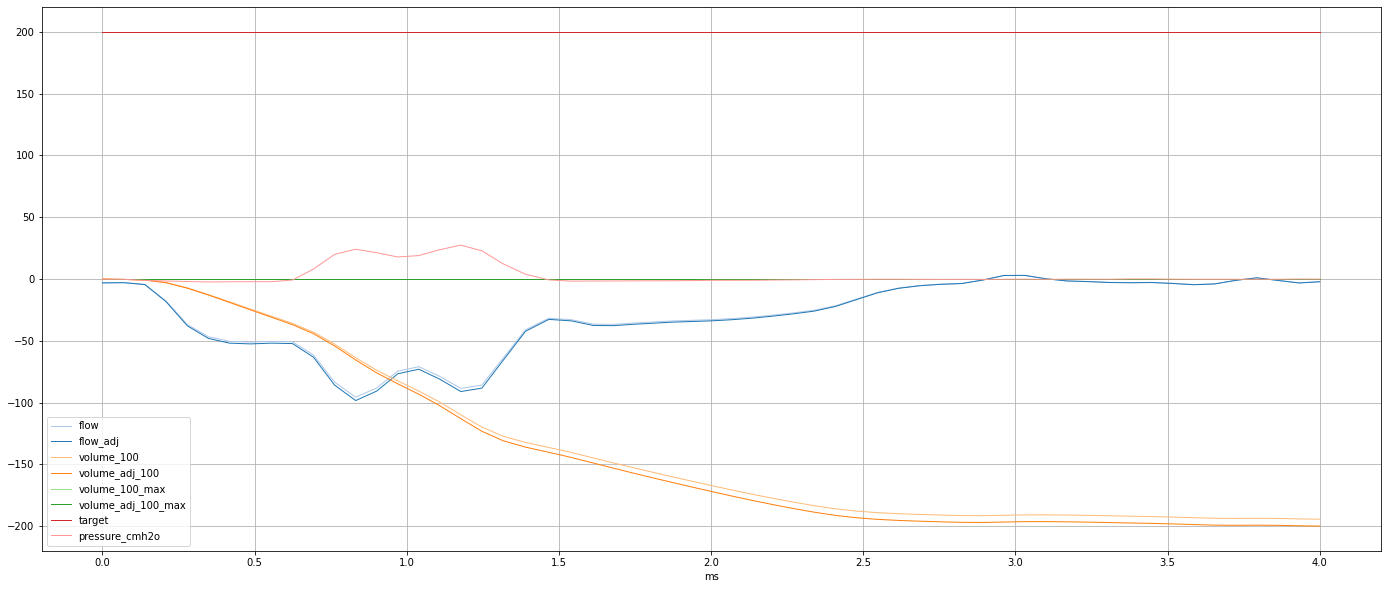

In [7]:
# Compute the adjusted K
new_k = start_k * (target_volume / max(abs(df['volume'].min()), df['volume'].max()))

# Compute the new volume - step 1, compute an adjusted flow
df['flow_adj'] = (df['flow']/start_k)*new_k

# Compute the new volume - step 2, volume change per sample, adjusted SLM to L/s
volume_adj_temp = ms_diff * (df['flow_adj']/60)

# Compute the volume - step 3, cumulative sum
df['volume_adj'] =  volume_adj_temp.cumsum()

# Now for charting we'll add a volume * 100
df['volume_adj_100'] = df['volume_adj'] * 100

# Add a max volume mark
df['volume_adj_100_max'] = df['volume_adj_100'].max()

df.plot(x='ms', y=['flow', 'flow_adj', 'volume_100', 'volume_adj_100', 'volume_100_max', 'volume_adj_100_max', 'target', 'pressure_cmh2o'], grid=True, figsize=[24, 10])

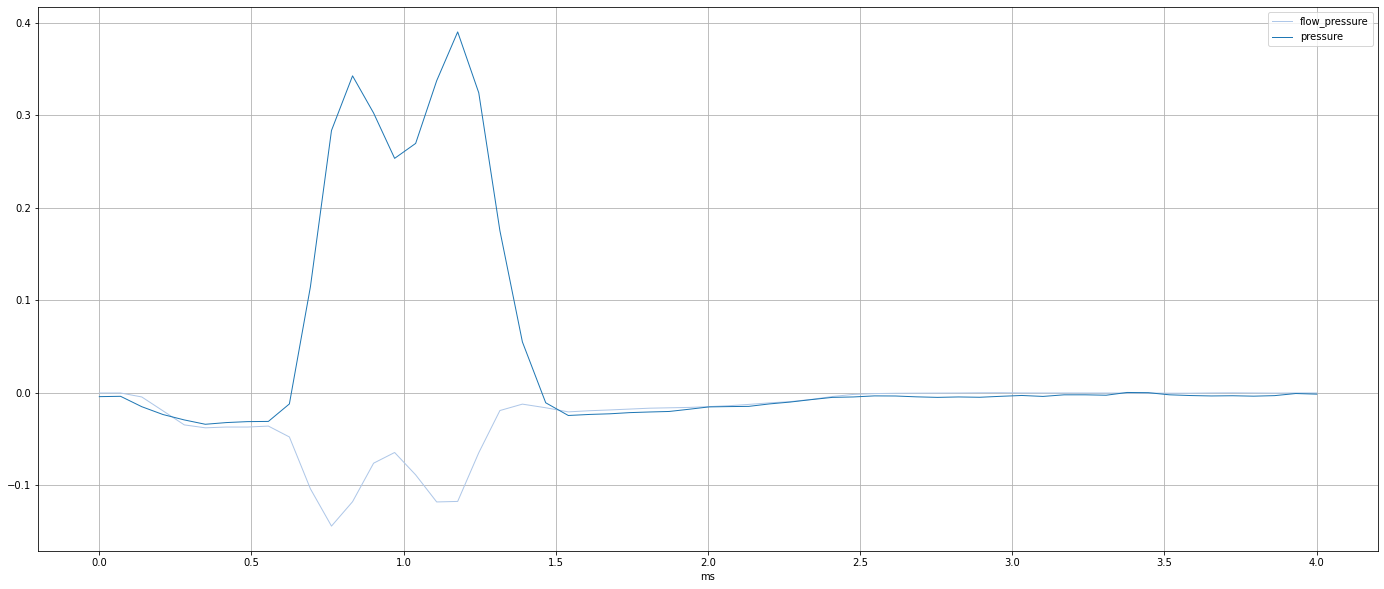

In [8]:
df.plot(x='ms', y=['flow_pressure', 'pressure'], grid=True, figsize=[24, 10])


In [9]:
new_k

0.05443168507853136